In [1]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
%matplotlib notebook

In [3]:
camera = cv2.VideoCapture(0)

def grab_frame():
    ret, frame = camera.read()
    return frame

In [4]:
# https://docs.opencv.org/3.1.0/d7/d8b/tutorial_py_face_detection.html#gsc.tab=0
face_cascade = cv2.CascadeClassifier("data/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("data/haarcascades/haarcascade_eye.xml")

<IPython.core.display.Javascript object>


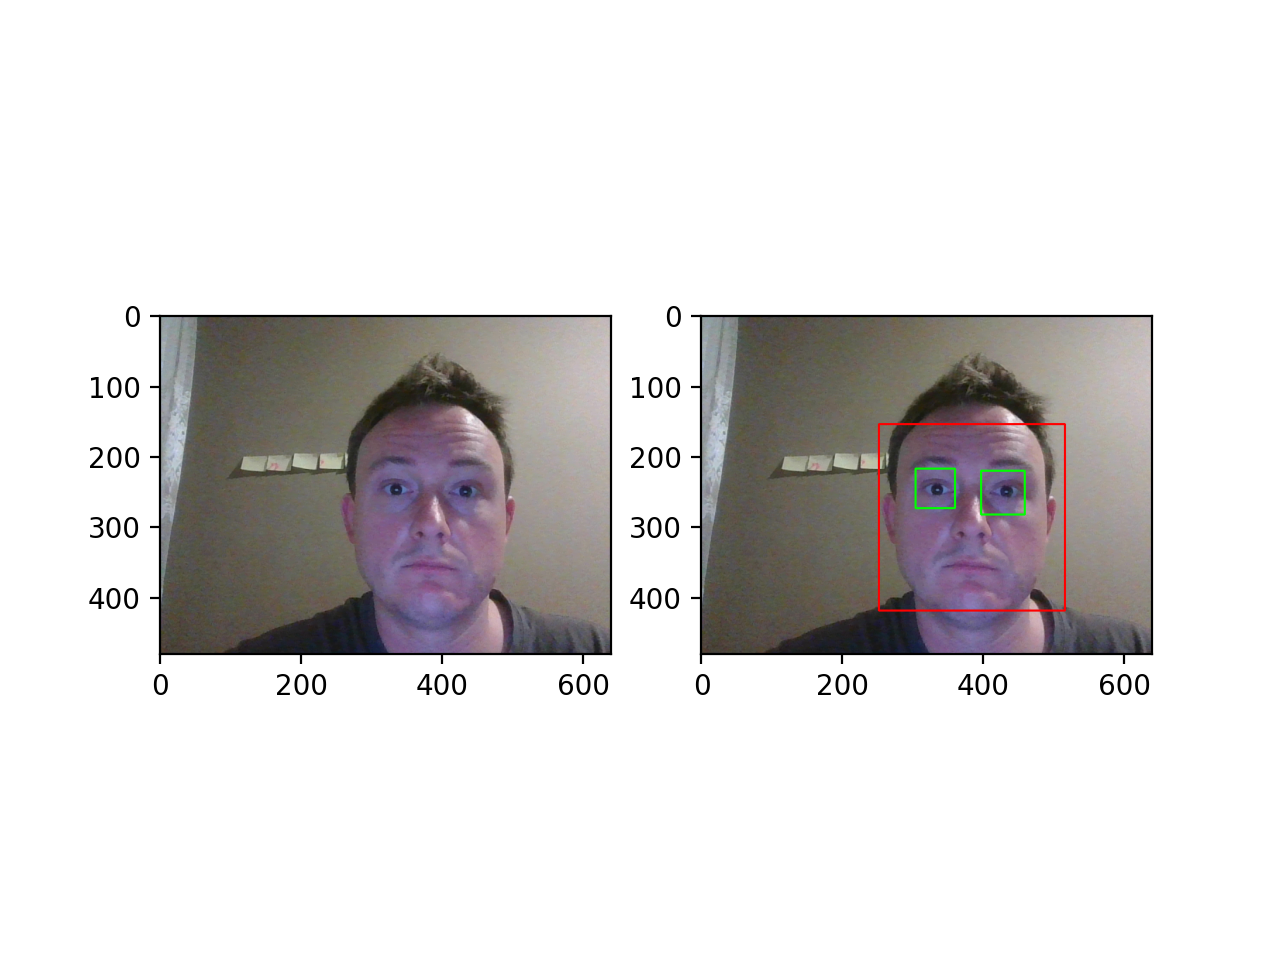

In [5]:
#create two subplots
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

#create two image plots
frame = grab_frame()
im1 = ax1.imshow(frame)
im2 = ax2.imshow(frame)

def update(i):
    frame = grab_frame()
    imin = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    imout = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray)
    for (x,y,w,h) in faces:
        imout = cv2.rectangle(imout,(x,y), (x+w,y+h), (255,0,0), 2)
        
        eyes = eye_cascade.detectMultiScale(gray[y:y+h, x:x+w])
        for (ex,ey,ew,eh) in eyes:
            imout = cv2.rectangle(imout, (x + ex, y + ey), (x + ex + ew, y + ey + eh), (0,255,0), 2)
    
    im1.set_data(imin)
    im2.set_data(imout)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cap1.release()

ani = FuncAnimation(plt.gcf(), update, interval=50)
plt.show()